[Link to colab](https://colab.research.google.com/github/lsmin0152/cheb301/blob/main/notebooks/CHEB301_F25_13_LogisticRegression.ipynb)

## **Logistic Regression**

[[-0.79030608 -1.76007185]
 [ 0.67044074 -1.07780593]
 [-1.32768281 -1.3317107 ]
 [ 0.4315465   1.76629951]
 [ 0.89695026  1.55860376]]
[0 2 0 3 3]


/Users/sangmin/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


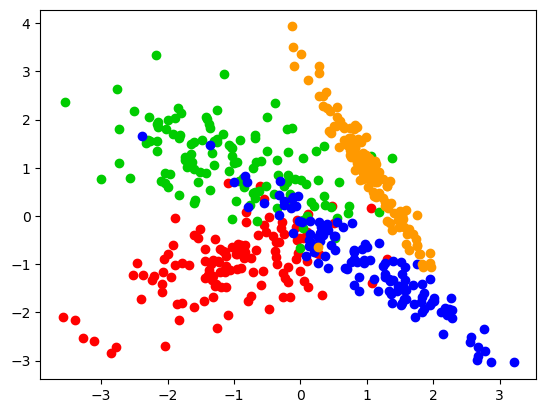

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

# define problem
n      = 500   # number of data points
m      = 2     # size of feature vector
Nclass = 4     # number of classes
model_type = 'ovr' # ovr = one-versus-rest

# construct dataset 
X_train, y_train = make_classification(
    n_samples=n,
    n_features=m,
    n_classes=Nclass,
    n_redundant=0,
    n_clusters_per_class=1,
    n_informative=m,
)

colors = ['#FF0000', '#00CC00', '#0000FF', '#FF9900']

for i in range(Nclass):
    idx_in_the_class = np.argwhere(y_train == i).flatten()
    plt.plot(X_train[idx_in_the_class,0], X_train[idx_in_the_class,1],'o',color=colors[i])

# define a model
model = LogisticRegression(
    multi_class='ovr',
    solver='lbfgs',
    max_iter=1000
)

# train the model
model.fit(X_train, y_train)

# check outcome of trained model
y_pred = model.predict(X_train)

print(X_train[:5])
print(y_pred[:5])


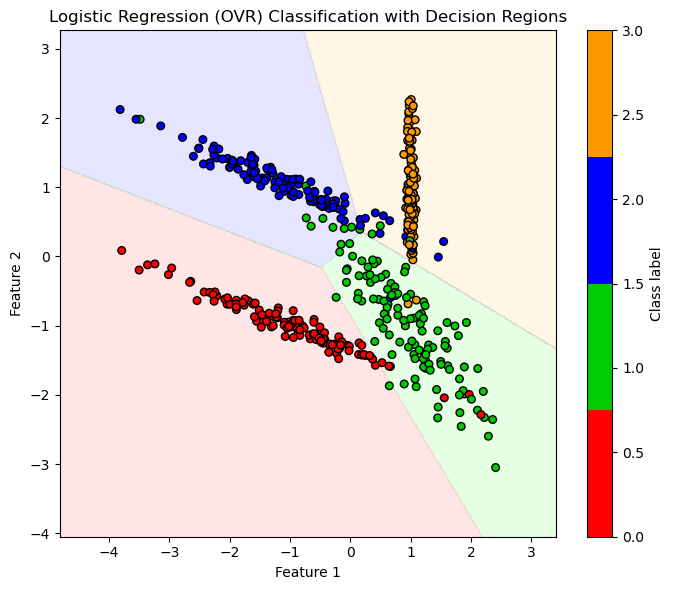

In [48]:

########### Visualization

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFE4AA'])
cmap_bold  = ListedColormap(['#FF0000', '#00CC00', '#0000FF', '#FF9900'])

# grid generation for visualizing decision boundary 
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 400),
    np.linspace(y_min, y_max, 400)
)

# prediction for the background grid 
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid_points)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7, 6))

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

# plotting real data
plt.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c=y_train,
    cmap=cmap_bold,
    edgecolor='k',
    s=30
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression (OVR) Classification with Decision Regions")
plt.colorbar(label='Class label')
plt.tight_layout()
plt.show()